In [203]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [204]:
df=pd.read_excel(r'Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [206]:
df.duplicated().sum()

16

In [207]:
df=df.drop_duplicates()
df.duplicated().sum()

0

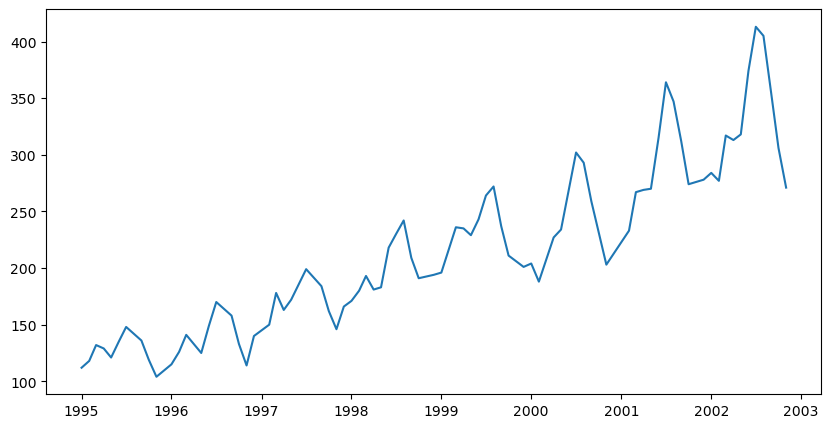

In [208]:
plt.figure(figsize=(10,5))
plt.plot(df)

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

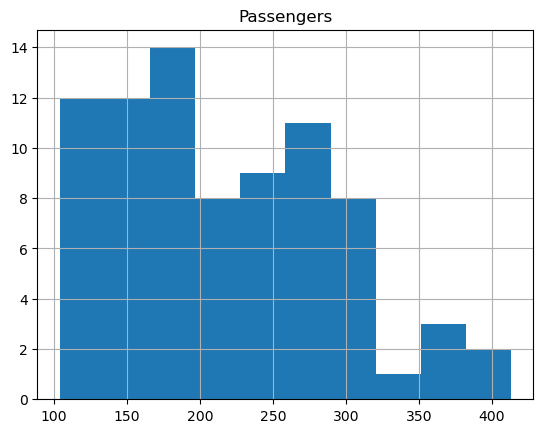

In [209]:
df.hist()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

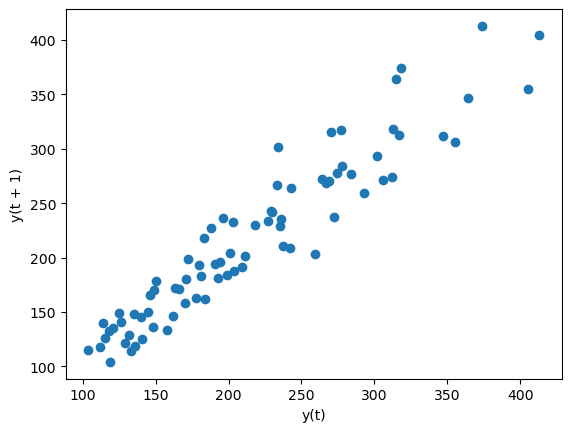

In [210]:
lag_plot(df['Passengers'])

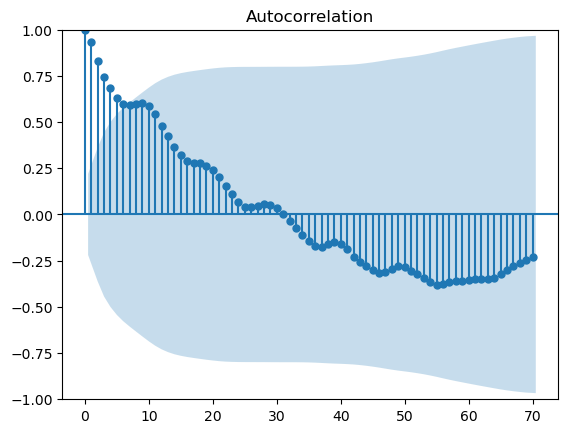

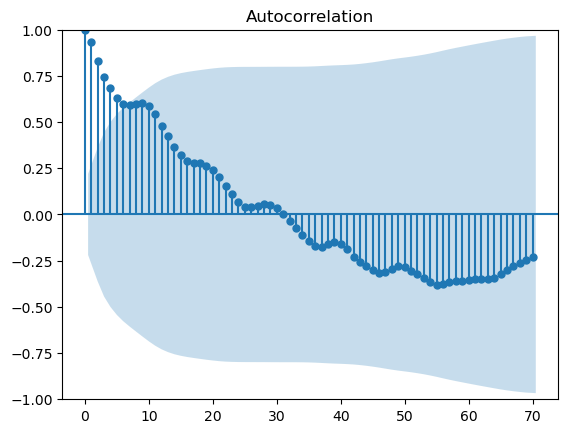

In [211]:
plot_acf(df,lags=70)

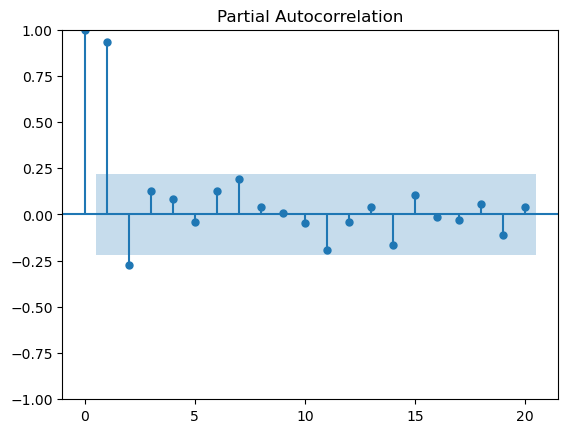

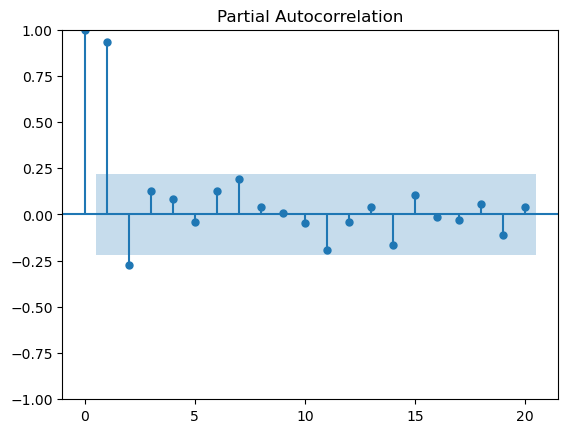

In [212]:
plot_pacf(df)

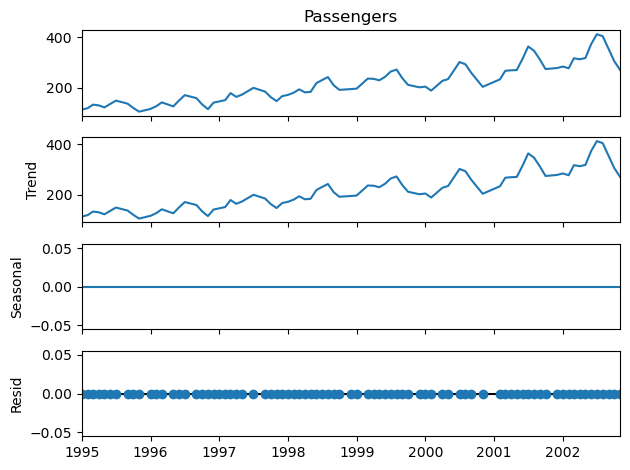

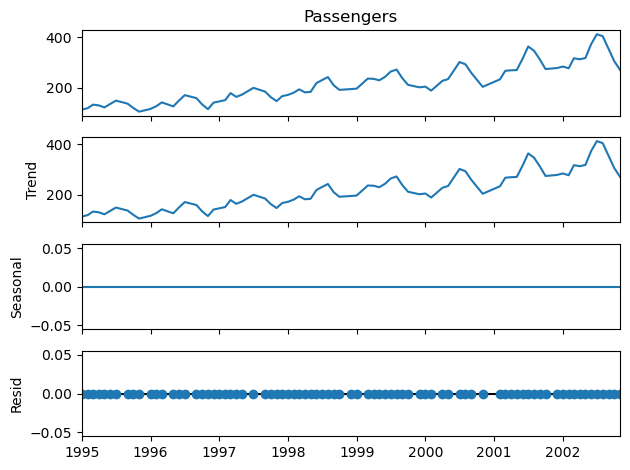

In [213]:
result=seasonal_decompose(df.Passengers,model='additive', extrapolate_trend='freq', period=1)
result.plot()

# ARIMA

In [214]:
values=df.values

In [215]:
a=adfuller(values)
a

(0.9137442106153228,
 0.9932670959770877,
 9,
 70,
 {'1%': -3.5274258688046647,
  '5%': -2.903810816326531,
  '10%': -2.5893204081632653},
 609.2219949894317)

In [216]:
# since p value (0.99) is greater than 0.025. The time series is non stationary.

In [217]:
#Detrending
data = pd.DataFrame(df["Passengers"].diff())
detrended = data.dropna()
b = adfuller(detrended.values)[1]
b

3.2066318038488144e-08

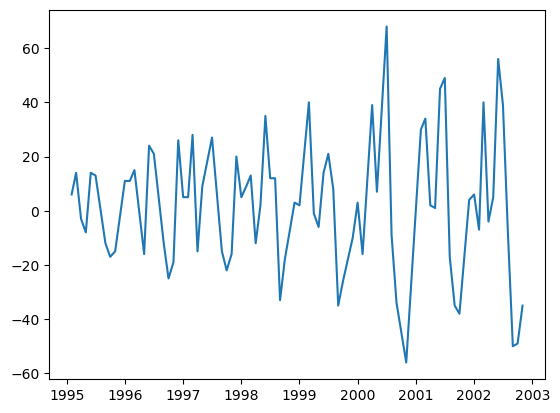

In [218]:
plt.plot(detrended)

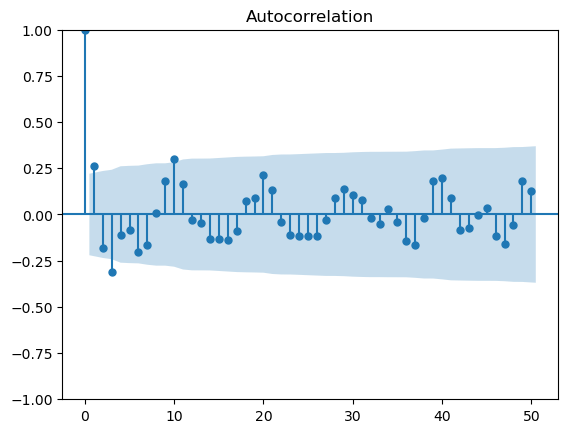

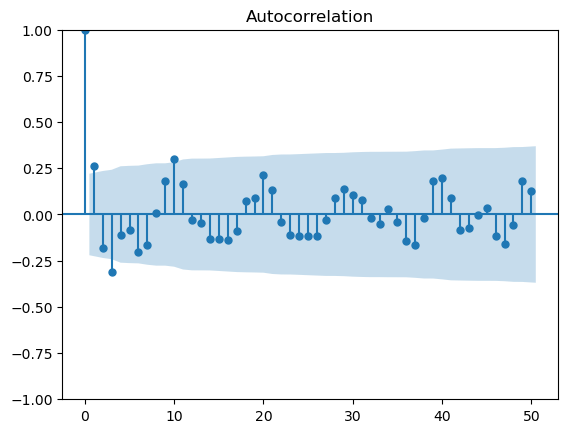

In [219]:
plot_acf(detrended.values,lags=50)

In [220]:
X=df.values
X

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [136],
       [119],
       [104],
       [115],
       [126],
       [141],
       [125],
       [149],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [194],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [201],
       [204],
       [188],
       [227],
       [234],
       [302],
       [293],
       [259],
       [203],
       [233],
       [267],
       [269],
       [270],
       [315],
       [364],
       [347],
       [312],
       [274],
       [278],
       [284],
       [277],
      

In [221]:
X=X.astype('float32')

In [222]:
model=ARIMA(X,order=(1, 1, 1))
m=model.fit()

In [223]:
forecast=m.forecast(steps=5)
forecast

array([263.20230596, 263.19302646, 263.19301541, 263.1930154 ,
       263.1930154 ])

In [224]:
dataframe=pd.DataFrame(forecast,columns=['Forecasted values'])
dataframe

,Forecasted values
0,263.202306
1,263.193026
2,263.193015
3,263.193015
4,263.193015


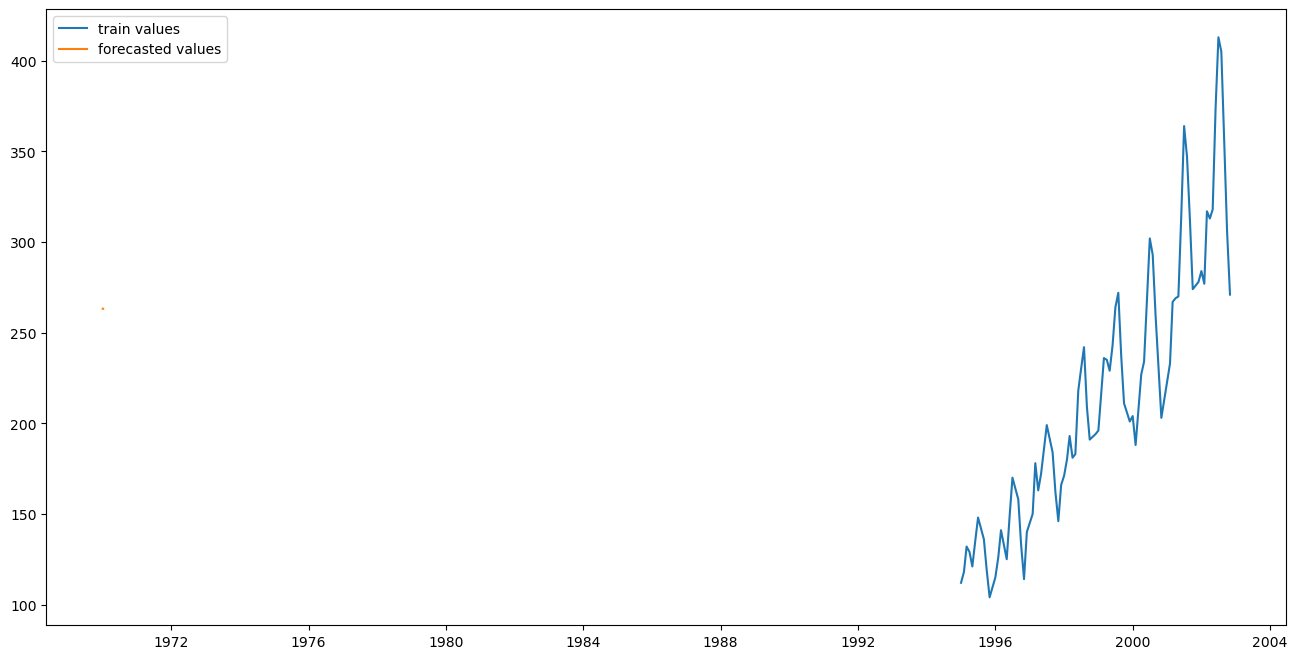

In [225]:
plt.figure(figsize=(16,8))
plt.plot(df["Passengers"], label='train values')
plt.plot(dataframe["Forecasted values"], label="forecasted values")
plt.legend(loc='best')
plt.show()

In [226]:
df.reset_index(inplace=True)

In [227]:
df["Month"] = df.Month.dt.strftime("%b")
df['t']=np.arange(1,len(df)+1)
df['t_square']=df['t']**2
df['log_passangers']=np.log(df['Passengers'])
OHE_df=pd.get_dummies(df,columns=['Month'])
OHE_df.head()

C:\Users\my computer\AppData\Local\Temp\ipykernel_12596\2083117686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df.Month.dt.strftime("%b")
C:\Users\my computer\AppData\Local\Temp\ipykernel_12596\2083117686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t']=np.arange(1,len(df)+1)
C:\Users\my computer\AppData\Local\Temp\ipykernel_12596\2083117686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Passengers,t,t_square,log_passangers,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [228]:
OHE_df.shape

(80, 16)

In [229]:
x = OHE_df.head(70)
y = OHE_df.tail(10)

In [230]:
x.head()

,Passengers,t,t_square,log_passangers,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,112,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,118,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,132,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,129,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,121,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


In [231]:
y.head()

,Passengers,t,t_square,log_passangers,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
70,277,71,5041,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
71,317,72,5184,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
72,313,73,5329,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
73,318,74,5476,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
74,374,75,5625,5.924256,0,0,0,0,0,0,1,0,0,0,0,0


In [232]:
# Linear Model
model1=smf.ols('Passengers~t',data=x).fit()
pred1=model1.predict(y['t'])
rmse1=np.sqrt(mean_squared_error(y['Passengers'],pred1))
rmse1

53.011390732242546

In [233]:
# Quadratic Model
model2=smf.ols('Passengers~t+t_square',data=x).fit()
pred2=model2.predict(y[['t','t_square']])
rmse2=np.sqrt(mean_squared_error(y['Passengers'],pred2))
rmse2

47.601245624733224

In [234]:
# Exponential Model
model3=smf.ols('log_passangers~t',data=x).fit()
pred3=model3.predict(y['t'])
rmse3=np.sqrt(mean_squared_error(y['log_passangers'],pred3))
rmse3

0.14042837466538316

In [235]:
# Addictive Seasonality
model4=smf.ols('Passengers~Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=x).fit()
pred4=model4.predict(y[['Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']])
rmse4=np.sqrt(mean_squared_error(y['Passengers'],pred4))
rmse4

133.83160113796725

In [236]:
# Addictive Quadratic Seasonality 
model5=smf.ols('Passengers~t+t_square+Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=x).fit()
pred5=model5.predict(y[['t','t_square','Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']])
rmse5=np.sqrt(mean_squared_error(y['Passengers'],pred5))
rmse5

24.297691319916733

In [237]:
# Multiplicative Seasonality
model6=smf.ols('log_passangers~Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=x).fit()
pred6=model6.predict(y[['Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']])
rmse6=np.sqrt(mean_squared_error(y['log_passangers'],pred6))
rmse6

0.5509071525699639

In [238]:
# Multiplicative Quadratic Seasonality
model7=smf.ols('log_passangers~t+t_square+Month_Apr+Month_Aug+Month_Dec+Month_Feb+Month_Jan+Month_Jul+Month_Jun+Month_Mar+Month_May+Month_Nov+Month_Oct+Month_Sep',data=x).fit()
pred7=model7.predict(y[['t','t_square','Month_Apr','Month_Aug','Month_Dec','Month_Feb','Month_Jan','Month_Jul','Month_Jun','Month_Mar','Month_May','Month_Nov','Month_Oct','Month_Sep']])
rmse7=np.sqrt(mean_squared_error(y['log_passangers'],pred7))
rmse7

0.03577619262268654

In [239]:
data1=pd.DataFrame(data={'Models':['Linear Model','Quadratic Model','Exponential Model','Addictive Seasonality','Addictive Quadratic Seasonality','Multiplicative Seasonality','Multiplicative Quadratic Seasonality'],'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]})

In [240]:
data1

,Models,RMSE
0,Linear Model,53.011391
1,Quadratic Model,47.601246
2,Exponential Model,0.140428
3,Addictive Seasonality,133.831601
4,Addictive Quadratic Seasonality,24.297691
5,Multiplicative Seasonality,0.550907
6,Multiplicative Quadratic Seasonality,0.035776
